## Content
- The dataset is a CSV, where each row is a tweet. The different columns are described below. Every conversation included has at least one request from a consumer and at least one response from a company. Which user IDs are company user IDs can be calculated using the inbound field.

### tweet_id
- A unique, anonymized ID for the Tweet. Referenced by response_tweet_id and in_response_to_tweet_id.

### author_id
- A unique, anonymized user ID. @s in the dataset have been replaced with their associated anonymized user ID.

### inbound
- Whether the tweet is "inbound" to a company doing customer support on Twitter. This feature is useful when re-organizing data for training conversational models.

### created_at
- Date and time when the tweet was sent.

### text
- Tweet content. Sensitive information like phone numbers and email addresses are replaced with mask values like __email__.

### response_tweet_id
- IDs of tweets that are responses to this tweet, comma-separated.

### in_response_to_tweet_id
- ID of the tweet this tweet is in response to, if any.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

In [2]:
#Read in data
df = pd.read_csv('twcs/twcs.csv')
data = df.copy()

In [3]:
data.head(20)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messages and no one is responding as usual,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"@115712 Can you please send us a private message, so that I can gain further details about your account?","5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,"@115713 This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your connectivity for me and my whole family ? 🤥 💯,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,"@115713 We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",12,16.0


In [4]:
data.info()  #Checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
tweet_id                   int64
author_id                  object
inbound                    bool
created_at                 object
text                       object
response_tweet_id          object
in_response_to_tweet_id    float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [21]:
print("The response rate is {} %".format(2017439 /2811774 * 100))

The response rate is 71.74968542991009 %


In [13]:
data['customer_support_name'] = data['author_id'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

In [20]:
data['tweet_id'].groupby(data['customer_support_name']).count()

customer_support_name
ATT                2790  
ATVIAssist         17650 
AWSSupport         1035  
AdobeCare          9917  
AirAsiaSupport     12829 
AirbnbHelp         8875  
AlaskaAir          7478  
AldiUK             8114  
AmazonHelp         169840
AmericanAir        36764 
AppleSupport       106860
ArbysCares         1904  
ArgosHelpers       12174 
Ask                33438 
AskAmex            11358 
AskCiti            4081  
AskDSC             210   
AskLyft            11809 
AskPapaJohns       3908  
AskPayPal          11298 
AskPlayStation     19098 
AskRBC             1011  
AskRobinhood       432   
AskSeagate         639   
AskTarget          13218 
AskTigogh          715   
AskVirginMoney     914   
AskeBay            9686  
AsurionCares       1898  
AzureSupport       7565  
                   ...   
TMobileHelp        34317 
TacoBellTeam       4082  
Tesco              38573 
TfL                2243  
TwitterSupport     1290  
UPSHelp            17817 
USCellularCares 

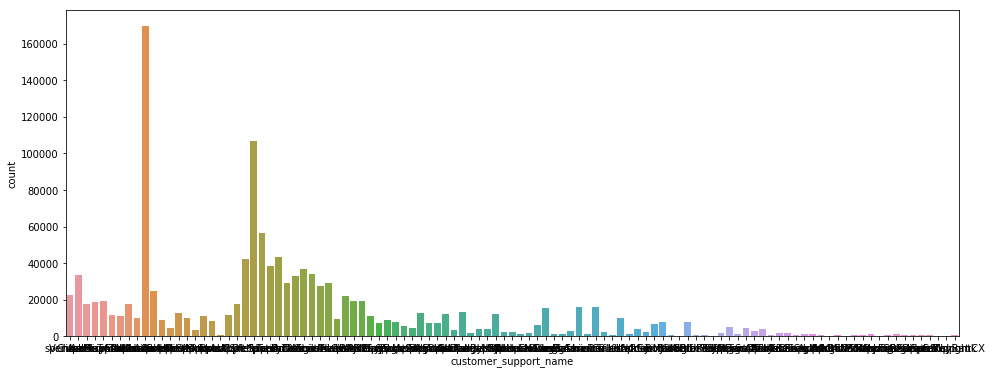

In [16]:
plt.figure(figsize=(16, 6))
sns.countplot(data['customer_support_name'])

In [14]:
data.describe()

,tweet_id,in_response_to_tweet_id
count,2.811774e+06,2.017439e+06
mean,1.504565e+06,1.463141e+06
std,8.616450e+05,8.665730e+05
min,1.000000e+00,1.000000e+00
25%,7.601652e+05,7.155105e+05
50%,1.507772e+06,1.439805e+06
75%,2.253296e+06,2.220646e+06
max,2.987950e+06,2.987950e+06


In [8]:
data.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64